In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

weather_df = pd.read_csv("D:\RESEARCH\Dasarnya\MATH\Step_4_Statistics and Calculus Python\My Source Code\Work_3\weather_data.csv")
weather_df

,day,city,weather
0,0,St Louis,sunny
1,0,New York,cloudy
2,0,San Francisco,sunny
3,1,New York,rain
4,1,St Louis,cloudy
5,1,San Francisco,windy
6,2,San Francisco,sunny
7,2,New York,cloudy
8,2,St Louis,cloudy
9,3,New York,sunny


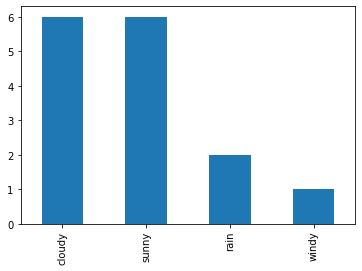

In [5]:
weather_df['weather'].value_counts().plot.bar()
plt.show()

Memvisualisasikan informasi yang sama seperti step sebelumnya

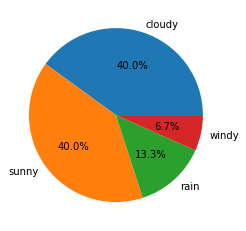

In [6]:
weather_df['weather'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")
plt.show()

Sekarang kita visualisasikan jumlah jenis cuaca ini. sekalian dengan informasi ttg persentase yang dihitung setiap jenis cuaca. Di sini saya akan menggunakan metode groupby()

In [7]:
weather_df.groupby(['weather','city'])['weather'].count().unstack('city')

city,New York,San Francisco,St Louis
weather,,,
cloudy,3.0,NaN,3.0
rain,1.0,NaN,1.0
sunny,1.0,4.0,1.0
windy,NaN,1.0,NaN


Kita lihat, objek ini memuat informasi yang kita butuhkan. Selanjutnya, kita akan memvisualisasi tabel yang kita punya dengan menggunakan <i>stacked bar plot</i>

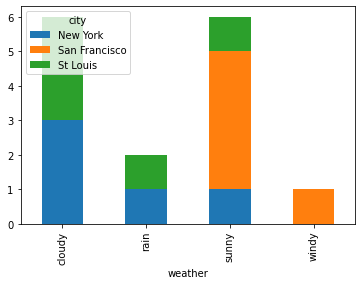

In [8]:
weather_df.groupby(['weather','city'])['weather'].count().unstack('city').fillna(0).plot(kind='bar',stacked=True)
plt.show()

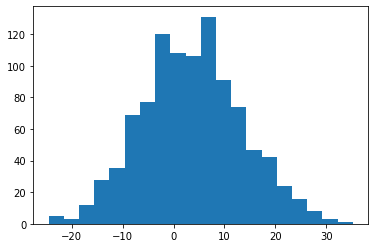

In [10]:
import numpy as np

samples = np.random.normal(4, 10, size=1000)
plt.hist(samples,bins=20)
plt.show()

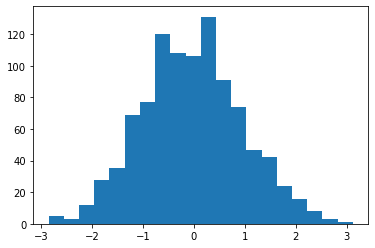

In [11]:
normalized_samples = (samples - 4)/10
plt.hist(normalized_samples,bins=20)
plt.show()

In [12]:
sample_mean = np.mean(samples)
sample_sd = np.std(samples)

In [14]:
print(sample_mean)
print(sample_sd)

3.655907970014918
9.820748386953698


### MIN-MAX SCALING

Dalam dataset ini, 'Kolom 1' isinya 1000 sampel dari distribusi normal dengan mean 4 juga memiliki STD dengan nilai 10. 'Kolom 2' berisi 1000 sampel juga, dengan distribusi seragam dari 1 sampai 2. 'Kolom 3' berisi 1000 sampel dari distibusi beta berparameter 2 dan 5

In [16]:
df = pd.read_csv("D:\RESEARCH\Dasarnya\MATH\Step_4_Statistics and Calculus Python\My Source Code\Work_3\data.csv")
df

,Column 1,Column 2,Column 3
0,-1.231356,1.305917,0.511994
1,7.874195,1.291636,0.155032
2,13.169984,1.274973,0.183988
3,13.442203,1.549126,0.391825
4,-8.032985,1.895236,0.398122
...,...,...,...
995,-6.698953,1.030317,0.153306
996,14.777217,1.671622,0.204935
997,7.226261,1.098545,0.312753
998,-10.736601,1.116582,0.560168


Gunakan fungsi <b>min_max_scale</b> yang mengambil tiga parameter (data, a, b). Data harus berupa array dalam atribut dataset, sementara a dan be menentukan rentang tmpat data nantinya akan diubah.<br><br>
Di sini kita menggunakan operasi vektorisasi

In [17]:
def min_max_scale(data,a,b):
    data_max = np.max(data)
    data_min = np.min(data)
    return a + (b-a)*(data - data_min)/(data_max - data_min)

Untuk melihat efeknya, kita visualisasi terlebih dahulu

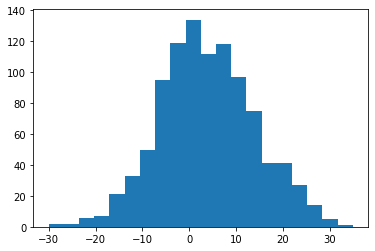

In [18]:
plt.hist(df['Column 1'],bins=20)
plt.show()

Selanjutnya, pakai fungsi <b>plt.hist()</b> untuk memvisualisasi nilai yang sudah direturn dari fungsi minmaxscale untuk menskalakannya ke rentang [-3, 3]

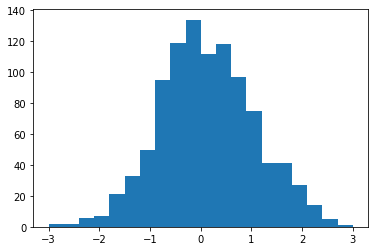

In [19]:
plt.hist(min_max_scale(df['Column 1'],-3,3),bins=20)
plt.show()

Dengan proses yang sama, untuk kolom 2

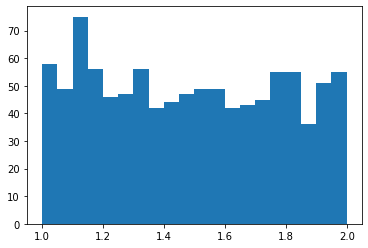

In [20]:
plt.hist(df['Column 2'], bins=20)
plt.show()

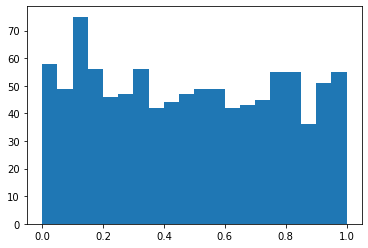

In [21]:
plt.hist(min_max_scale(df['Column 2'], 0, 1), bins=20)
plt.show()

Lagi-lagi untuk kolom 3

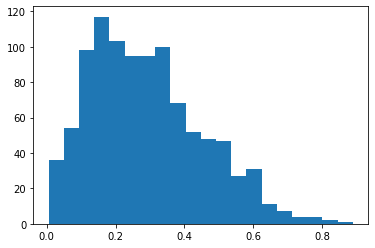

In [22]:
plt.hist(df['Column 3'], bins=20)
plt.show()

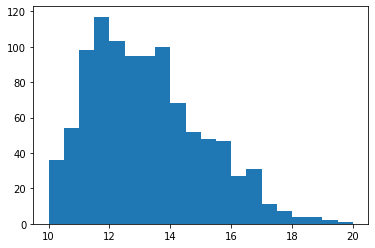

In [23]:
plt.hist(min_max_scale(df['Column 3'], 10, 20), \
                          bins=20)
plt.show()